# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


*  **area_primeiro_andar**: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.
*  **existe_segundo_andar**: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".
*  **area_segundo_andar**: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.
*  **quantidade_banheiros**: Indica o número total de banheiros na propriedade.
*  **capacidade_carros_garagem**: Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.
*  **qualidade_da_cozinha_Excelente**: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.
*  **preco_de_venda**: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

# 1. Ajustando uma reta

## Conhecendo os dados

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Lendo dados
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/one /Regressão Linear/Preços_de_casas.csv")
dados

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.00
1,2,117.2398,0,0.0000,2,460,0,894795.00
2,3,85.4680,1,80.4514,2,608,0,1101855.00
3,4,89.2769,1,70.2324,1,642,0,690200.00
4,5,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...,...
1433,1456,88.5337,1,64.4726,2,460,0,862750.00
1434,1457,192.5817,0,0.0000,2,500,0,1035300.00
1435,1458,110.3652,1,107.0208,2,252,0,1313845.00
1436,1459,100.1462,0,0.0000,1,240,0,700676.25


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [7]:
dados = dados.drop(columns = "Id")


In [8]:
#Quais fatores coletados?
dados.head()


,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [9]:
# Correlação
corr = dados.corr()
corr

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
area_primeiro_andar,1.000000,-0.376805,-0.253793,0.369368,0.481231,0.323496,0.616557
existe_segundo_andar,-0.376805,1.000000,0.917101,0.292780,-0.001284,-0.020045,0.138541
area_segundo_andar,-0.253793,0.917101,1.000000,0.412777,0.131938,0.025248,0.305311
quantidade_banheiros,0.369368,0.292780,0.412777,1.000000,0.409281,0.154102,0.563132
capacidade_carros_garagem,0.481231,-0.001284,0.131938,0.409281,1.000000,0.276759,0.640214
qualidade_da_cozinha_Excelente,0.323496,-0.020045,0.025248,0.154102,0.276759,1.000000,0.496223
preco_de_venda,0.616557,0.138541,0.305311,0.563132,0.640214,0.496223,1.000000


In [10]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


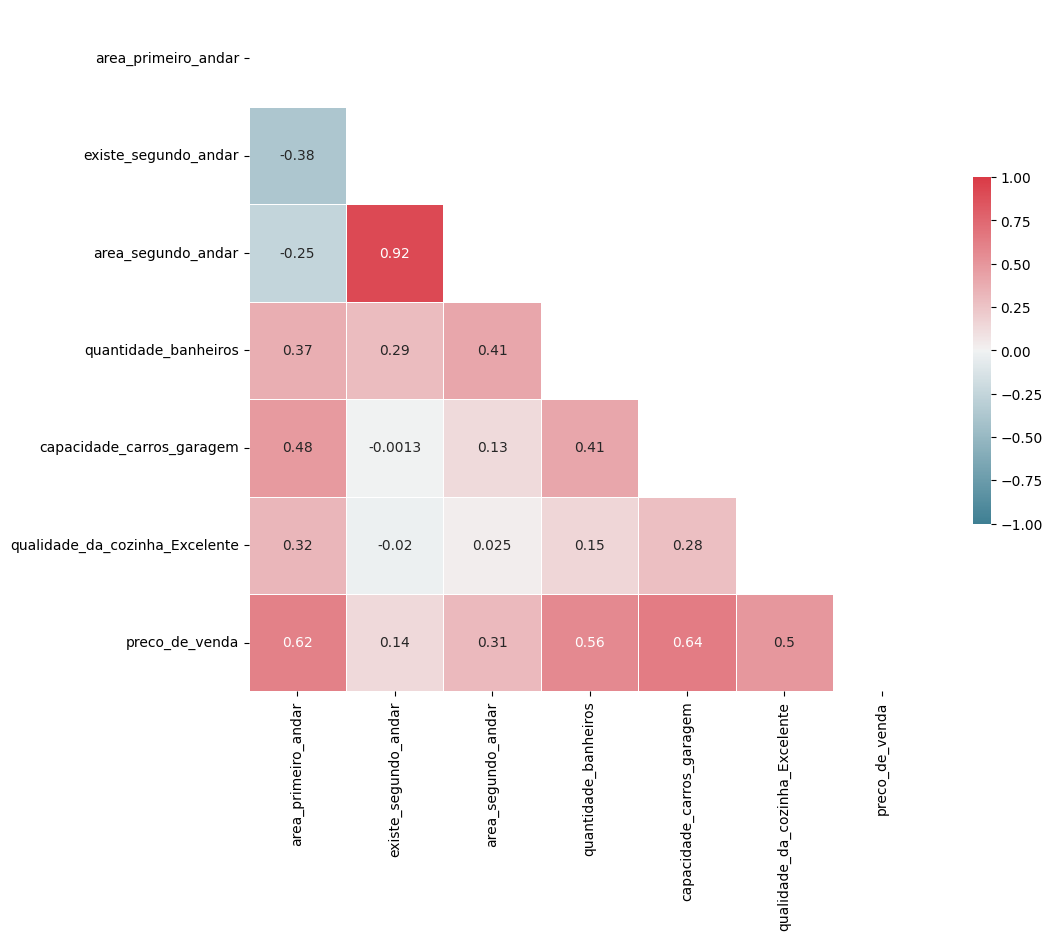

In [11]:
# Atividade
# Quais fatores estão mais correlacionados?
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()



*  A correlação entre a capacidade de carros na garagem e a área do primeiro andar é 0.48 moderadamente positiva, indicando que, em geral, à medida que a capacidade de carros na garagem aumenta, a área do primeiro andar da casa tende a aumentar também.
*  Entre garagem para carros e quantidade de banheiros é moderadamente positiva (0.409281), indicando que, em geral, à medida que a capacidade da garagem aumenta, o número de banheiros também tende a aumentar. Isso sugere uma possível associação entre o espaço para estacionamento de veículos e o tamanho da residência.
*  Quando olhamos para a correlação entre a área do primeiro andar e a área do segundo andar, verificamos que é fraca e negativa (-0.25). Isso sugere que, em geral, quando a área do primeiro andar de uma casa aumenta, a área do segundo andar tende a diminuir um pouco, e vice-versa. Essa relação indica uma possível compensação entre as áreas dos dois andares, mas não é uma relação muito forte e pode variar entre diferentes propriedades.
**  Observação: É importante notar que a correlação não implica causalidade; ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.

## Relacionando variáveis

In [12]:
# importando as visualizações
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

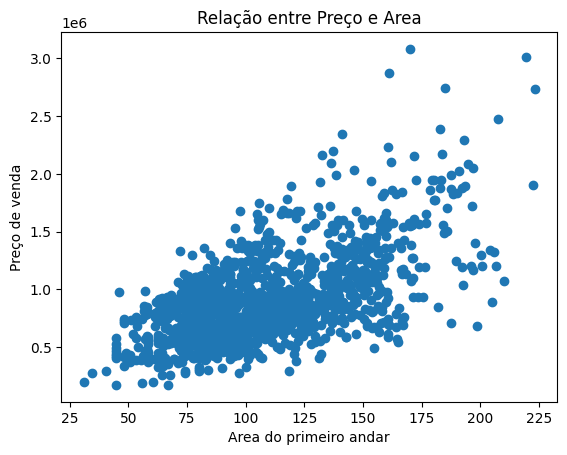

In [13]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

## Como podemos pensar em trazer a linha para o gráfico?
 Nesse caso, seria interessante estabelecer dois pontos. O primeiro ponto pode ser, por exemplo, uma casa qualquer no início do gráfico, no canto inferior esquerdo, que mede 66 metros quadrados e custa 250 mil reais, aproximadamente.

Após estabelecer esse primeiro ponto, podemos utilizar o método plt.axline() para definí-lo no gráfico, logo abaixo do método plt.scatter(). Entre parênteses, o xy1 será igual a esses pontos: primeiro o x, de 66 metros quadrados, e depois o y, de 250000 reais.

O segundo ponto que ajudará a construir a reta, será do canto superior direito do gráfico, formando uma linha crescente. Vamos considerar um ponto de, aproximadamente, 190 metros quadrados, e que custa, aproximadamente, 1 milhão e 800 mil reais. Nesse caso, definiremos o xy2 igual a 190 e 1800000.

Para finalizar, podemos adicionar uma cor diferente à linha, para distinguir entre os pontos do gráfico. Para isso, adicionamos o atributo color e definimos como "red", por exemplo.

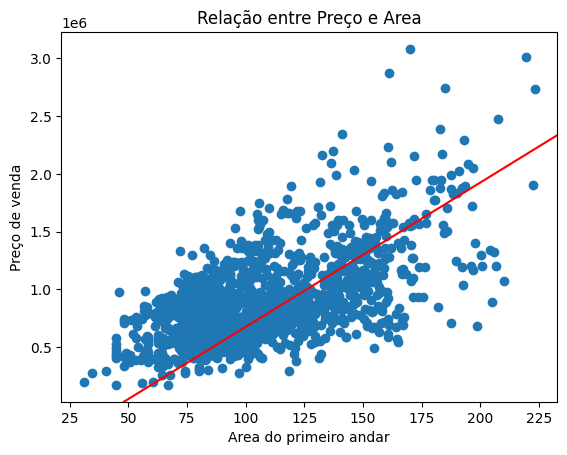

In [14]:
# Aparentemente, quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )

## Melhor reta

Para definir essa reta, vamos chamar o método px.scatter(). Entre parênteses, indicaremos que x será igual a area_primeiro_andar entre aspas simples, enquanto y será igual a preco_de_venda.

Além disso, ainda entre parênteses, podemos chamar dados antes das definições de x e y. Existem também dois argumentos que irão trazer exatamente a linha mais apropriada. São eles:

* trendline_color_override;
* E trendline.

O trendline_color_override é a cor da melhor linha, definida como "red", enquanto a melhor linha propriamente dita é justamente o trendline, cujo método é o **ols**.

In [15]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

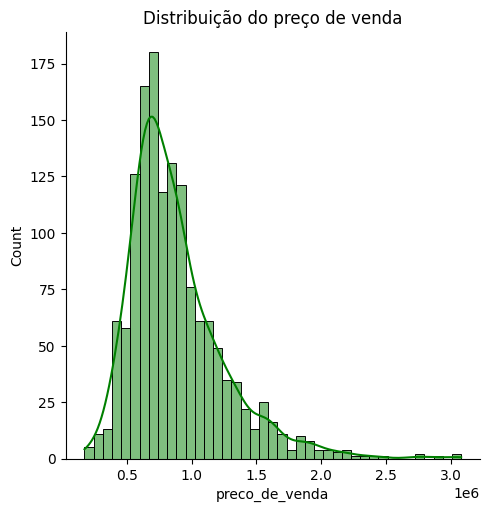

In [16]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [48]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [49]:
#Definindo y eX
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [50]:
#Aplicando o split do y e x
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [51]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = Y_train

In [38]:
#import ols
from statsmodels.formula.api import ols

In [39]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

Dividimos o conjunto de dados em duas partes: uma para treinamento e outra para teste. Essa abordagem visa garantir que nosso modelo de regressão, responsável por estabelecer a reta, não fique limitado a um único conjunto de dados, mas seja capaz de generalizar. Além disso, podemos avaliar a capacidade desse modelo de se generalizar para novos conjuntos, ou seja, ele não se restringe apenas às áreas específicas do primeiro andar presentes nos dados de treinamento.

## Analisando os coeficientes

(intensidade, direção e significância)




In [40]:
# visualizando os parametros
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


Como podemos interpretar esse coeficiente? Seu valor está expresso em reais (R$), considerando que a unidade de medida do preço de venda também está em reais. Isso significa que, em média, um aumento de 1 metro quadrado na área do primeiro andar está associado a um acréscimo de Rs 6.793 no valor da casa.

In [41]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        21:14:54   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

Entre essas informações, podemos visualizar os efeitos, incluindo o intercepto e o coeficiente associado à área do primeiro andar. Além disso, temos acesso ao erro, ao valor de teste t e ao p-valor para a área do primeiro andar. Quando o p-valor é significativamente baixo, isso indica que a área do primeiro andar tem um impacto significativo no preço de venda da casa. Portanto, ao analisar os coeficientes, é importante considerar o sinal, a magnitude e a significância do efeito.

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

* Variável Resposta (Y): Também chamada de variável dependente é aquela que estamos tentando prever.
* Intercepto (β₀): O ponto onde a linha de regressão intercepta o eixo vertical (Y), ou seja, o valor de Y quando X é igual a 0.
* Variável Explicativa (X): Também chamada de variável independente e é o fator que usamos para prever e explicar a variável resposta.
* Coeficientes de Regressão (β₁): Impacto de cada variável explicativa X na variável resposta, é o efeito de X em Y.
* Erro Residual (e): Diferença entre os valores reais e previstos da variável resposta.
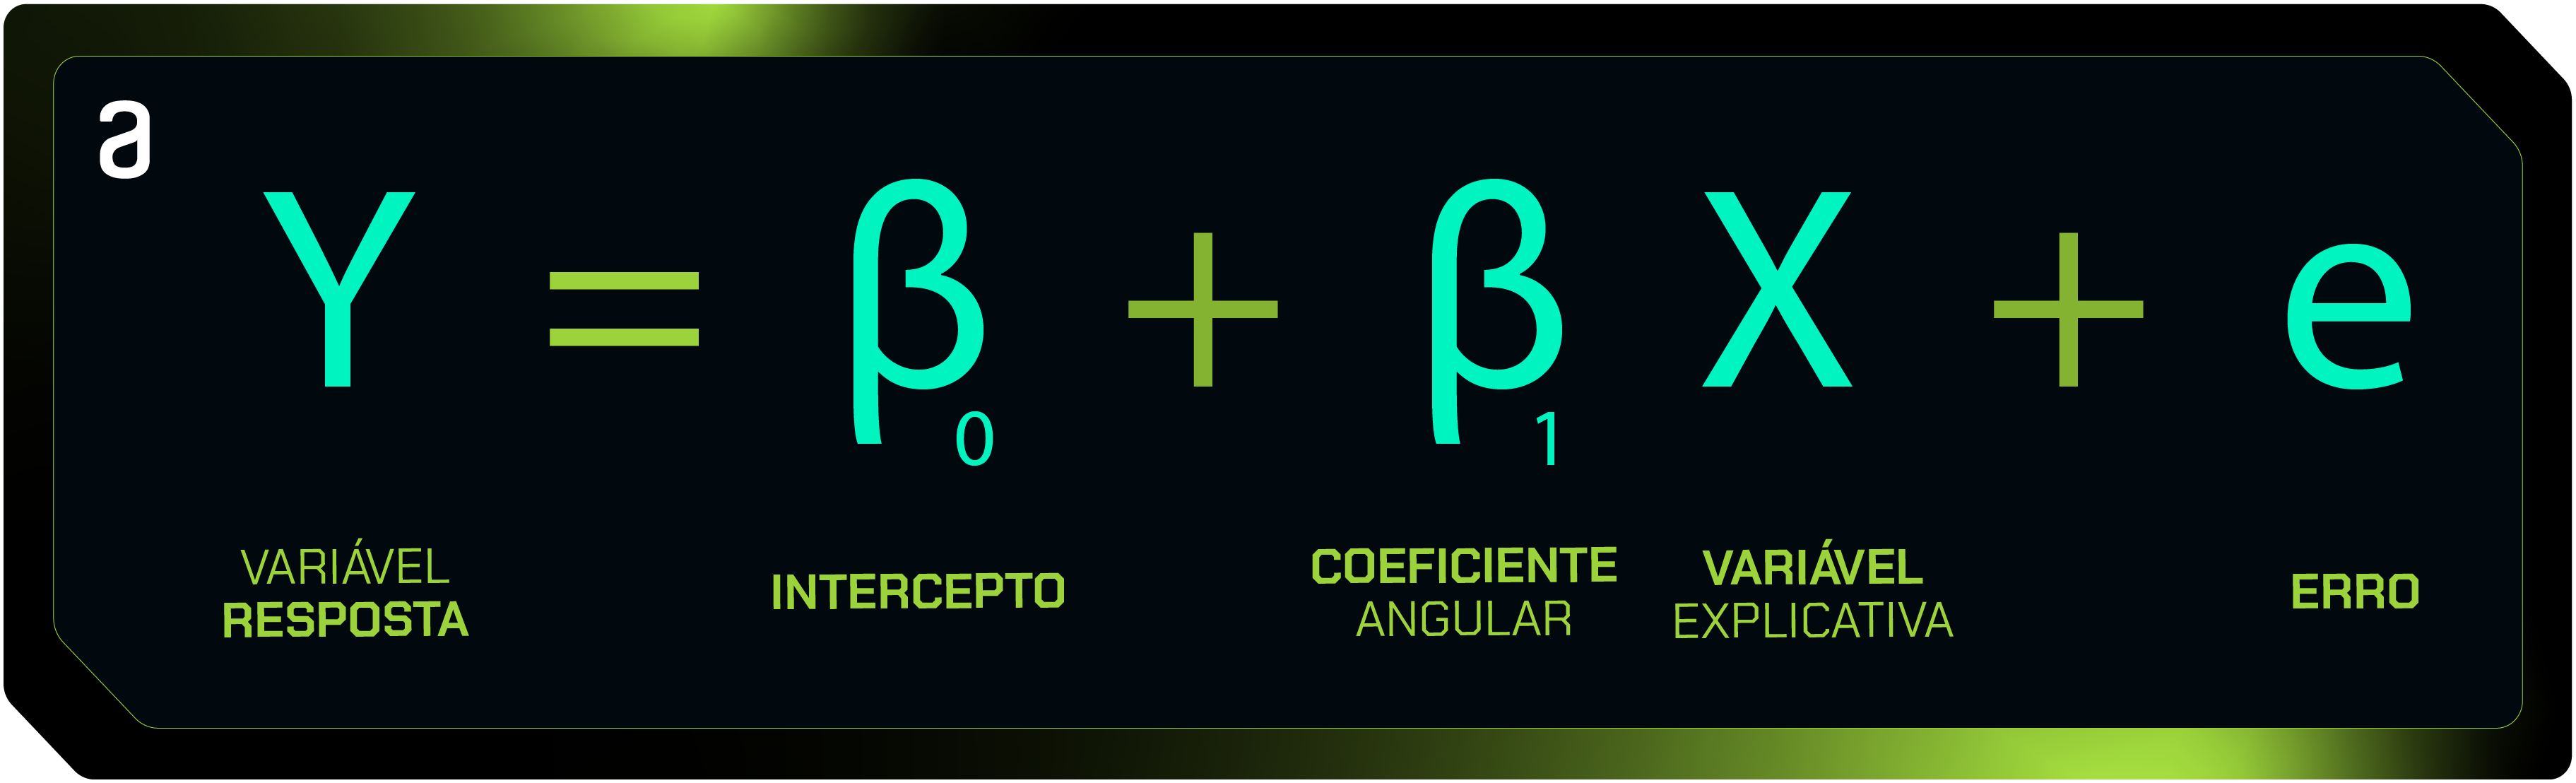

In [42]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendendo o resíduo

In [43]:
# Quais são os resíduos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


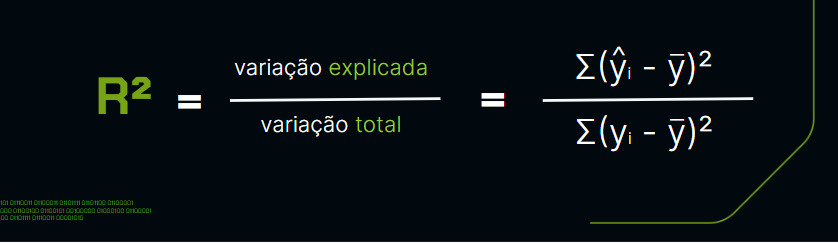

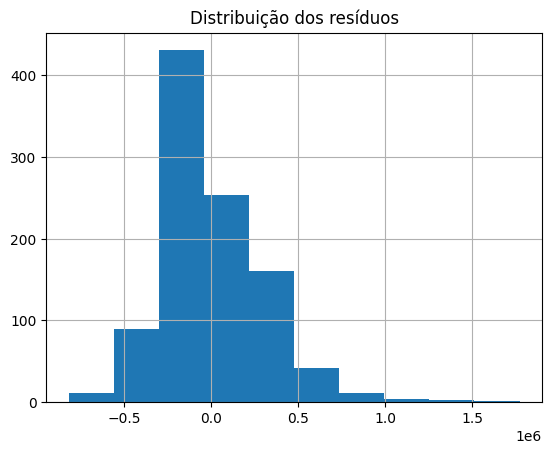

In [44]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

Ao observarmos o comportamento dos resíduos, percebemos que a maioria deles está próximo de zero, o que é desejável, pois indica que nosso modelo está cometendo menos erros.

Para determinar se o modelo está bem ajustado, é importante que a distribuição dos resíduos siga uma forma de sino, conforme esperado pela teoria da regressão linear.

Além disso, queremos que a maioria dos resíduos esteja concentrada em torno de zero, o que sugere que a diferença entre os valores observados e os valores estimados é pequena.

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [45]:
# definindo o y previsto
y_predict = modelo_0.predict(X_test)

In [46]:
# importando o r2 score
from sklearn.metrics import r2_score

In [53]:
#printando o R²
print("R²: ", r2_score(Y_test,y_predict))

R²:  0.38530928723202407


Quando examinamos o R² entre os conjuntos y_test e y_predito - isto é, entre os valores observados e os valores previstos pelo modelo - esperamos que esse número seja similar ao R² obtido durante o treinamento.

Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.37, notamos que os valores de 0.37 e 0.38 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste.

É fundamental lembrar que esse valor representa a proporção da variação nos preços das casas explicada pela área do primeiro andar, que é de aproximadamente 38%. No entanto, ainda restam 62% da variação que não é explicada por essa variável. Esses fatores não considerados precisarão ser adicionados ao nosso modelo para melhorar sua capacidade de previsão.



# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

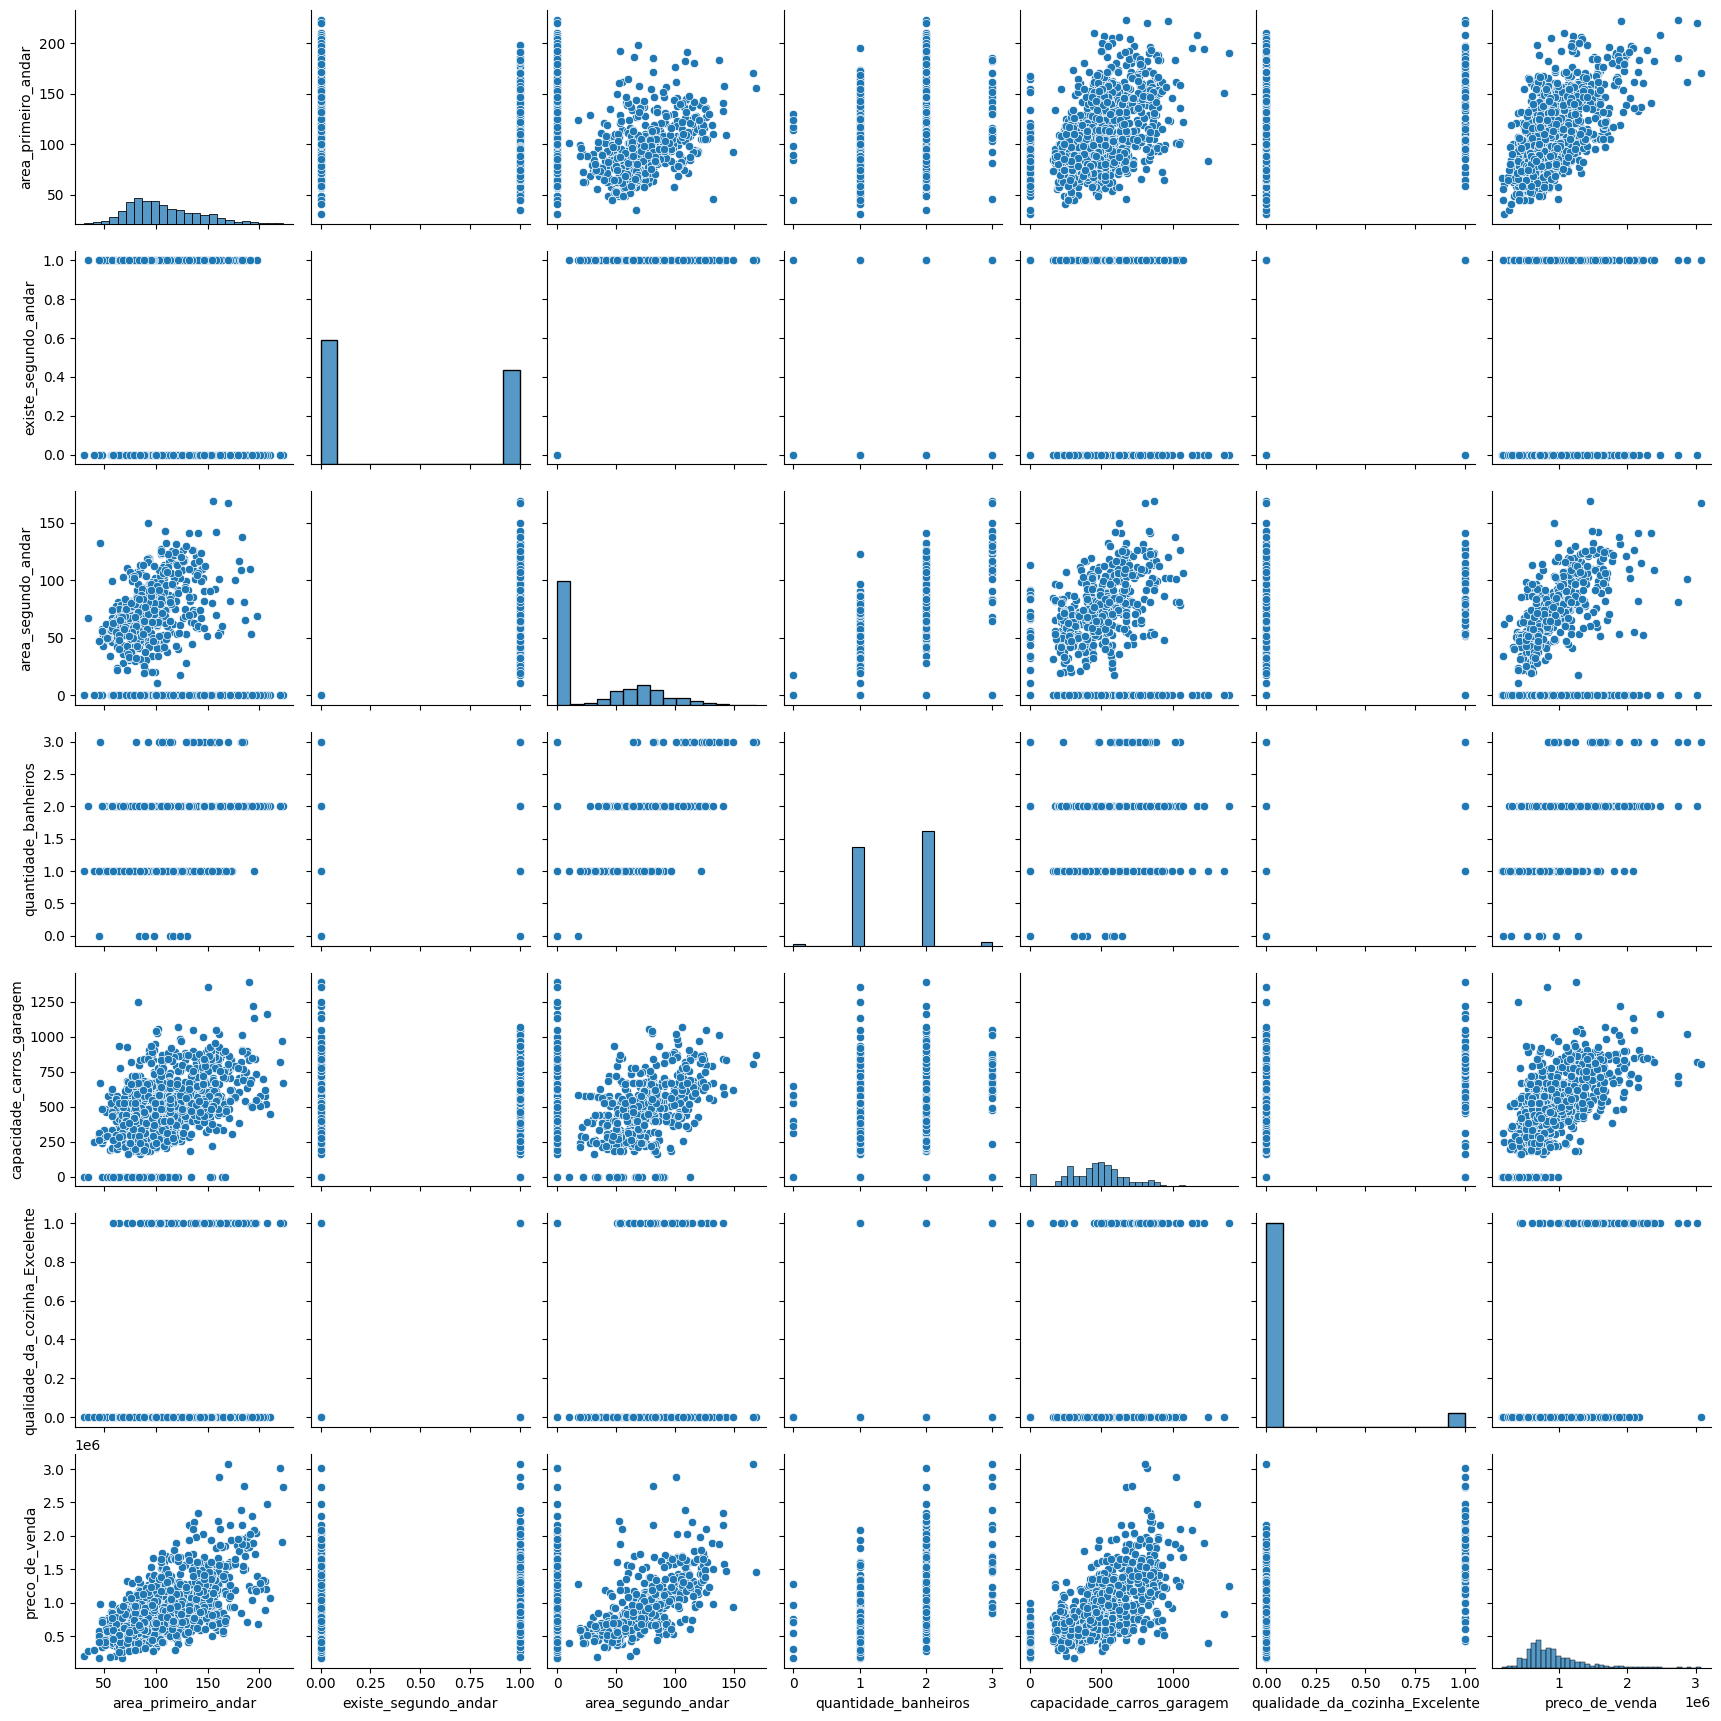

In [54]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [55]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

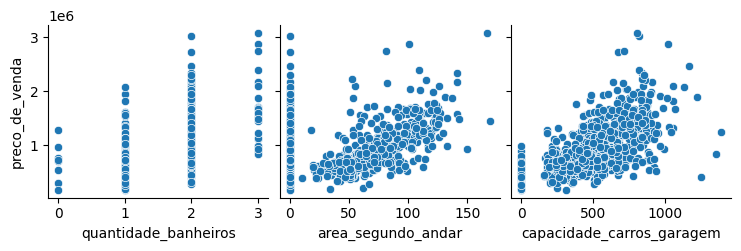

In [57]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [58]:
# importando a api do statsmodels
import statsmodels.api as sm

In [59]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [60]:
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [62]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

Esse modelo está explicando o preço da casa com base em todas essas variáveis. Nele, temos a biblioteca sm utilizada, o método OLS que ajusta uma regressão linear, a variável resposta y_train e o X_train. Entre os colchetes, adicionamos as variáveis que serão exibidas: const, area_primeiro_andar, existe_segundo_andar, area_segundo_andar, quantidade_banheiros, capacidade_carros_garagem e qualidade_da_cozinha_Excelente.

In [63]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

Ao realizar uma análise crítica disso, temos duas informações do segundo andar: se ele existe e qual sua área. Por isso, ao adicionar todas as variáveis entre os colchetes, adicionamos somente uma dessas duas (existe_segundo_andar) para não exibir duas informações explicando a mesma coisa.

In [64]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

Esse modelo não tem a informação da garagem. Em seu interior, trouxemos as mesmas variáveis, só que sem as informações da capacidade de carros da garagem.

In [65]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          2.79e-289
Time:                        21:44:11   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [66]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          1.93e-264
Time:                        21:45:22   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [67]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          4.15e-227
Time:                        21:45:30   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando modelos
Qual o melhor modelo?


In [68]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)


R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [69]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


Temos o número 2 para o modelo 0, porque há dois parâmetros: o intercepto e o efeito do primeiro andar. Já no primeiro modelo temos sete variáveis explicativas, ou seja, sete aspectos explicando o preço da casa — nesse modelo temos, inclusive, o maior R². Isso porque há uma relação entre o R² e a quantidade de fatores explicando o preço da casa.

É importante entender esse aspecto do R², porque, apesar de estarmos falando sobre o quão explicativo está o modelo, ele também é ponderado pela quantidade de fatores explicativos que incluímos no modelo.

Mas como escolhemos o melhor modelo? Para isso, precisamos analisar o resumo de todos os modelos que ajustamos até agora.

In [90]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


Com isso em mente, qual pode ser o critério de escolha do modelo? Podemos escolher um modelo que não tem indício de multicolinearidade no rodapé e que também não teve mudança nesses coeficientes. Portanto, podemos escolher o terceiro modelo. Apesar de possuir um R² menor entre os três, ele não tem efeito de confundimento.

Ainda vamos analisar melhor esses aspectos com o modelo_3, mas também vale a pena trazer outros aspectos técnicos.

Nós fizemos uma análise manual desses três modelos, mas existem formas de analisá-los automaticamente — entre elas, a backward, a forward e a stepwise. Vamos disponibilizar uma atividade nesta aula sobre a análise automática desses modelos, mas também é importante pensar nesse processo de forma manual para saber como esses métodos automáticos acontecem.

Após escolher o modelo_3, poderemos analisa o efeito de cada variável explicativa para estabelecer e explicar o preço de venda da casa.

In [91]:
X_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

# 4. Precificando as casas

## Obtendo o R² da previsão

In [92]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

Após adicioná-lo, podemos executar novamente o comando das colunas de X_test para verificar se temos a constante como a primeira coluna. Agora, precisamos prever o preço das casas.

Em uma nova célula, vamos chamar o método predict do modelo_3. Então, modelo3.predict() passando o X_test.

Porém, precisamos colocar somente os fatores explicativos que estão dentro do modelo. Afinal, temos informações que não está dentro do modelo, como a capacidade da garagem e área do segundo andar.

Em predict(), vamos colocar o X_test, adicionar um par de colchetes para filtrar e outro par de colchetes que será a lista de tudo que precisamos ter.

Entre aspas, adicionamos os textos const, area_primeiro_andar, existe_segundo_andar, quantidade_banheiros, e, por último, qualidade_da_cozinha_Excelente.

Vamos apelidar esse código como predict_3, para armazenar todos os preço de venda de casas que estamos utilizando com o modelo_3.

In [93]:
# Prevendo com o modelo_3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [94]:
# Qual o R² da previsão?
modelo_3.rsquared

np.float64(0.6511289354898803)

E qual o R² do treino? Para comparar o previsto com o observado, vamos colocar um print(), usando o r2_score() do Scikit-learn.

O primeiro parâmetro são preços de vendas observados que vem de y_test, enquanto o segundo parâmetro são os preços de vendas previstos, predict_3.

In [96]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))

R²:  0.6432078074497706


## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [97]:
novo_imovel = pd.DataFrame({})



In [98]:
modelo_3.params

,0
const,-129979.678094
area_primeiro_andar,6119.653184
existe_segundo_andar,221306.959705
quantidade_banheiros,149036.289458
qualidade_da_cozinha_Excelente,444391.228573


In [99]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]
                            })

In [100]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


Se usássemos o modelo_0 para estabelecer o preço de venda dessa casa, ela custaria R$ 968.146,00.

Mas não foi esse modelo que usamos, usamos o modelo_3, que foi o último modelo.

Por isso, em uma nova célula, vamos usar o modelo_3.predict(), novamente passando o novo_imovel. Só que agora podemos colocar todas as variáveis, sem filtrar nenhuma informação.

Para não truncar o resultado, vamos trazer somente a linha 0, entre colchetes fora dos parênteses.

In [101]:
# Qual o preço desse imóvel com o modelo_3?
modelo_3.predict(novo_imovel)[0]

np.float64(1123758.2426020515)

Usando o modelo_3, a casa custaria, na verdade, R$ 1.123.758,00. Existe uma diferença de preços para cada um desses modelos.

Com o modelo_3, que é o modelo que escolhemos, conseguimos analisar para todas essas variáveis e estabelecer o preço de venda da casa.

## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [103]:
# Lendo várias casas
novas_casas = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/one /Regressão Linear/Novas_casas.csv", sep = ";")

In [104]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [105]:
novas_casas = novas_casas.drop(columns="Casa")

In [106]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()


,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


Nos certificamos que a constante foi adicionada, um dado muito importante para utilizar em nosso modelo e estabelecer o preço de vendas.

Agora, sim, podemos prever qual é o valor de vendas para todas essas casas. Inclusive, temos casas de diversas características diferentes.

Em uma nova célula, vamos trazer o modelo_3, que é o modelo que escolhemos, e novamente chamar o método predict(). Dessa vez, passaremos o DataFrame novas_casas.

In [107]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


In [108]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]
                            })

In [109]:
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,818686.169194


In [110]:
modelo_3.predict(novo_imovel)[0]

np.float64(1063173.8519646404)

# EXTRA

Ao desenvolver modelos de regressão com Statsmodels, é comum querer salvar esses modelos para uso futuro, seja para implantação em produção, compartilhamento com outros membros da equipe ou simplesmente para backup. Uma maneira conveniente de fazer isso em Python é usando a biblioteca pickle, que permite serializar objetos Python em arquivos e desserializá-los de volta para objetos Python. Essa biblioteca não precisa ser instalada, uma vez que já vem por padrão no Python.

Vamos explorar como salvar um modelo de regressão linear do Statsmodels com a biblioteca pickle e depois como fazer a leitura do arquivo.

Como salvar o Modelo com Pickle
Após treinar o modelo, podemos salvá-lo em um arquivo usando a biblioteca pickle. Para isso, é necessário importar a biblioteca e depois podemos usar a função pickle.dump(), informando o modelo e o arquivo como parâmetros.

In [112]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_3, arquivo)

## Carregar o Modelo de volta com Pickle
Depois de salvar o modelo, podemos carregá-lo de volta para uso posterior. Para fazer isso, basta usar o método pickle.load() utilizando o arquivo como parâmetro da função.

In [114]:
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_3 = pickle.load(arquivo)

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [115]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

Agora, podemos calcular o VIF, vif_1. Vamos criar um DataFrame vazio e adicionar duas colunas acrescentando pd.DataFrame(). A primeira é a variável explicativa 1 e a segunda é o cálculo do VIF. Vamos calcular isso dentro de uma lista, chamando o método que importamos, variance_inflation_factor.

Precisamos da base de treino, então, x_train. Vamos filtrar apenas as variáveis explicativas 1. Precisamos de um outro argumento aqui dentro, a variável que está sendo analisada. Não queremos só uma variável, queremos saber se existe correlação com todas as variáveis entre si. Então, vamos escrever i para calcular o VIF para todas as variáveis que estão dentro de explicativa_1.

In [117]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [118]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


Quando olhamos, vemos que existem duas variáveis, "existe segundo andar" e "área do segundo andar", com o VIF maior que 5. Faz sentido que essas duas variáveis, que falam sobre o mesmo aspecto, possam estar correlacionadas entre si, e pode ser que o efeito estabelecido dentro do modelo esteja se confundindo, já que elas são, na verdade, a mesma coisa.

Uma é a categorização da outra, então, se a área do segundo andar for zero, então, não existe. Se for maior que zero, então, existe o segundo andar.

É natural pensar que existe a multicolinearidade nesses modelos e pode ser que a interpretação daqueles coeficientes não esteja tão assertiva para nós, quando falamos sobre o modelo prescritivo. Queremos entender o efeito para estabelecer o preço de venda das casas.

Para finalizar, vamos olhar o VIF do modelo que escolhemos. Vamos copiar e colar o VIF 1 na última célula, mudando de 1 para 3, que é para o nosso modelo escolhido, o modelo 3.

In [119]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [120]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


Agora, temos VIFs bem baixos, quando olhamos para as variáveis explicativas. É isso que esperamos, quando os VIFs estão bem pequenos — inclusive, o mais indicado seja menor que 5 —, podemos falar que não existe a presença de multicolinearidade ou há um forte indício de que ela não existe.

## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [124]:
# Prevendo os valores do treino X_train[explicativas_3]

y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [125]:
fig = px.scatter(x=y_previsto_train, y=Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

Quanto mais próximo de uma reta, melhor está sendo o previsto do real.

Olhando para as casas que custam menos, parece que temos uma diferença pequena. Para um ponto específico, o Pyplot nos mostra que o preço real é 433 mil, e o preço previsto, ou seja, aquele que usamos o modelo para precificar, é 506 mil. Parece que não tem uma diferença tão grande.

Mas quando olhamos para casas mais caras, mais para o final desse gráfico, temos pontos mais dispersos, e pode ser que exista uma limitação no nosso modelo nesse caso.

Vamos olhar um valor bem atípico, um ponto que está muito fora de uma reta. Temos um ponto em que a casa custava em torno de 3 milhões, mas o nosso modelo precificou com 1 milhão.

In [126]:
modelo_3.resid

,0
1303,-14840.784163
326,-194658.976419
386,213463.451718
615,135279.777275
236,-6989.862248
...,...
777,299947.554523
271,-410640.655071
723,281074.420982
560,-447470.170027


In [127]:
# Residuos
residuos = modelo_3.resid

Podemos fazer outra análise gráfica. Trouxemos um código pronto que vai gerar um gráfico de dispersão, mas aqui estamos usando o Seaborn (biblioteca de visualização de dados Python). Temos os resíduos no eixo Y, e no eixo X, podemos utilizar os previstos do treino.

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

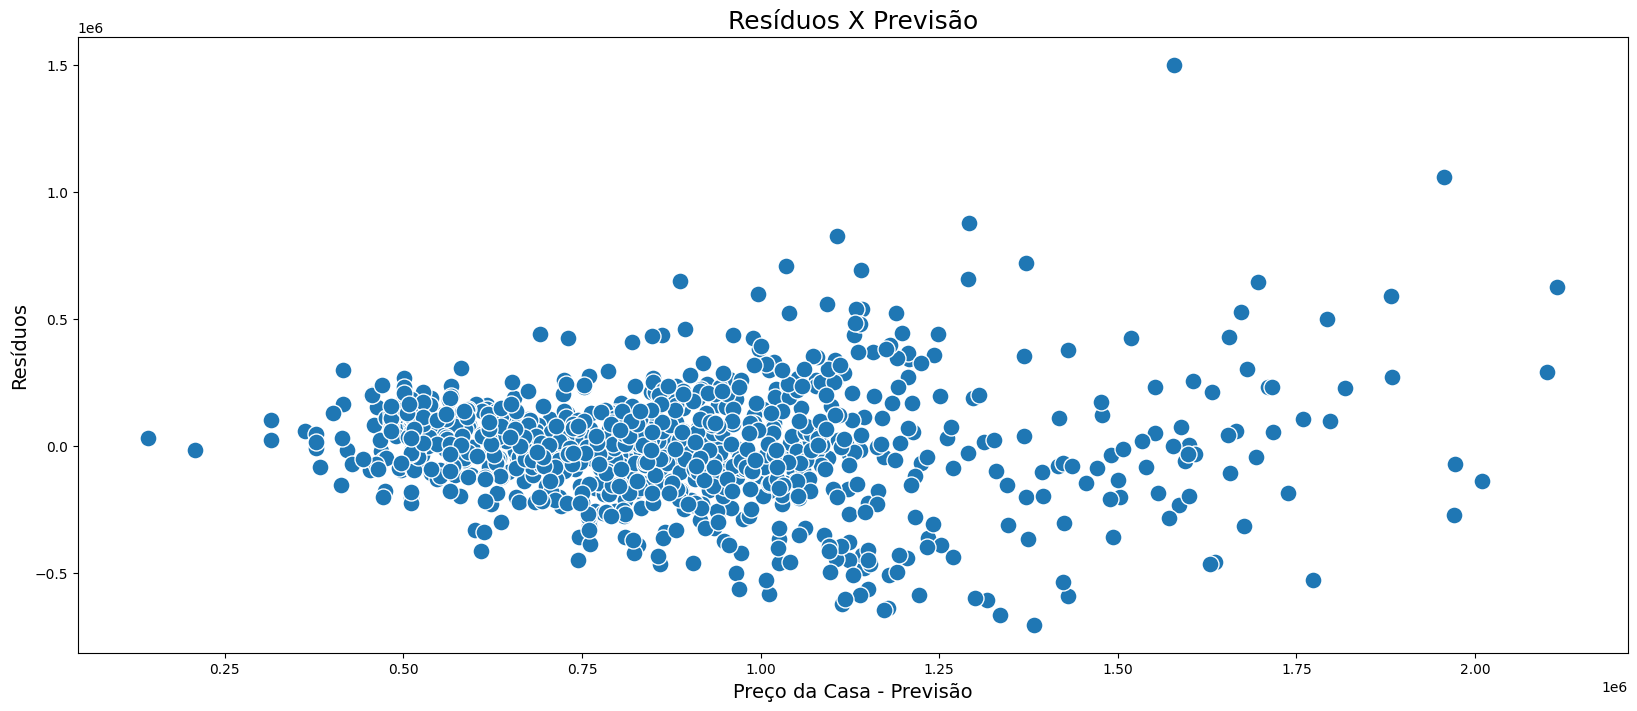

In [128]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

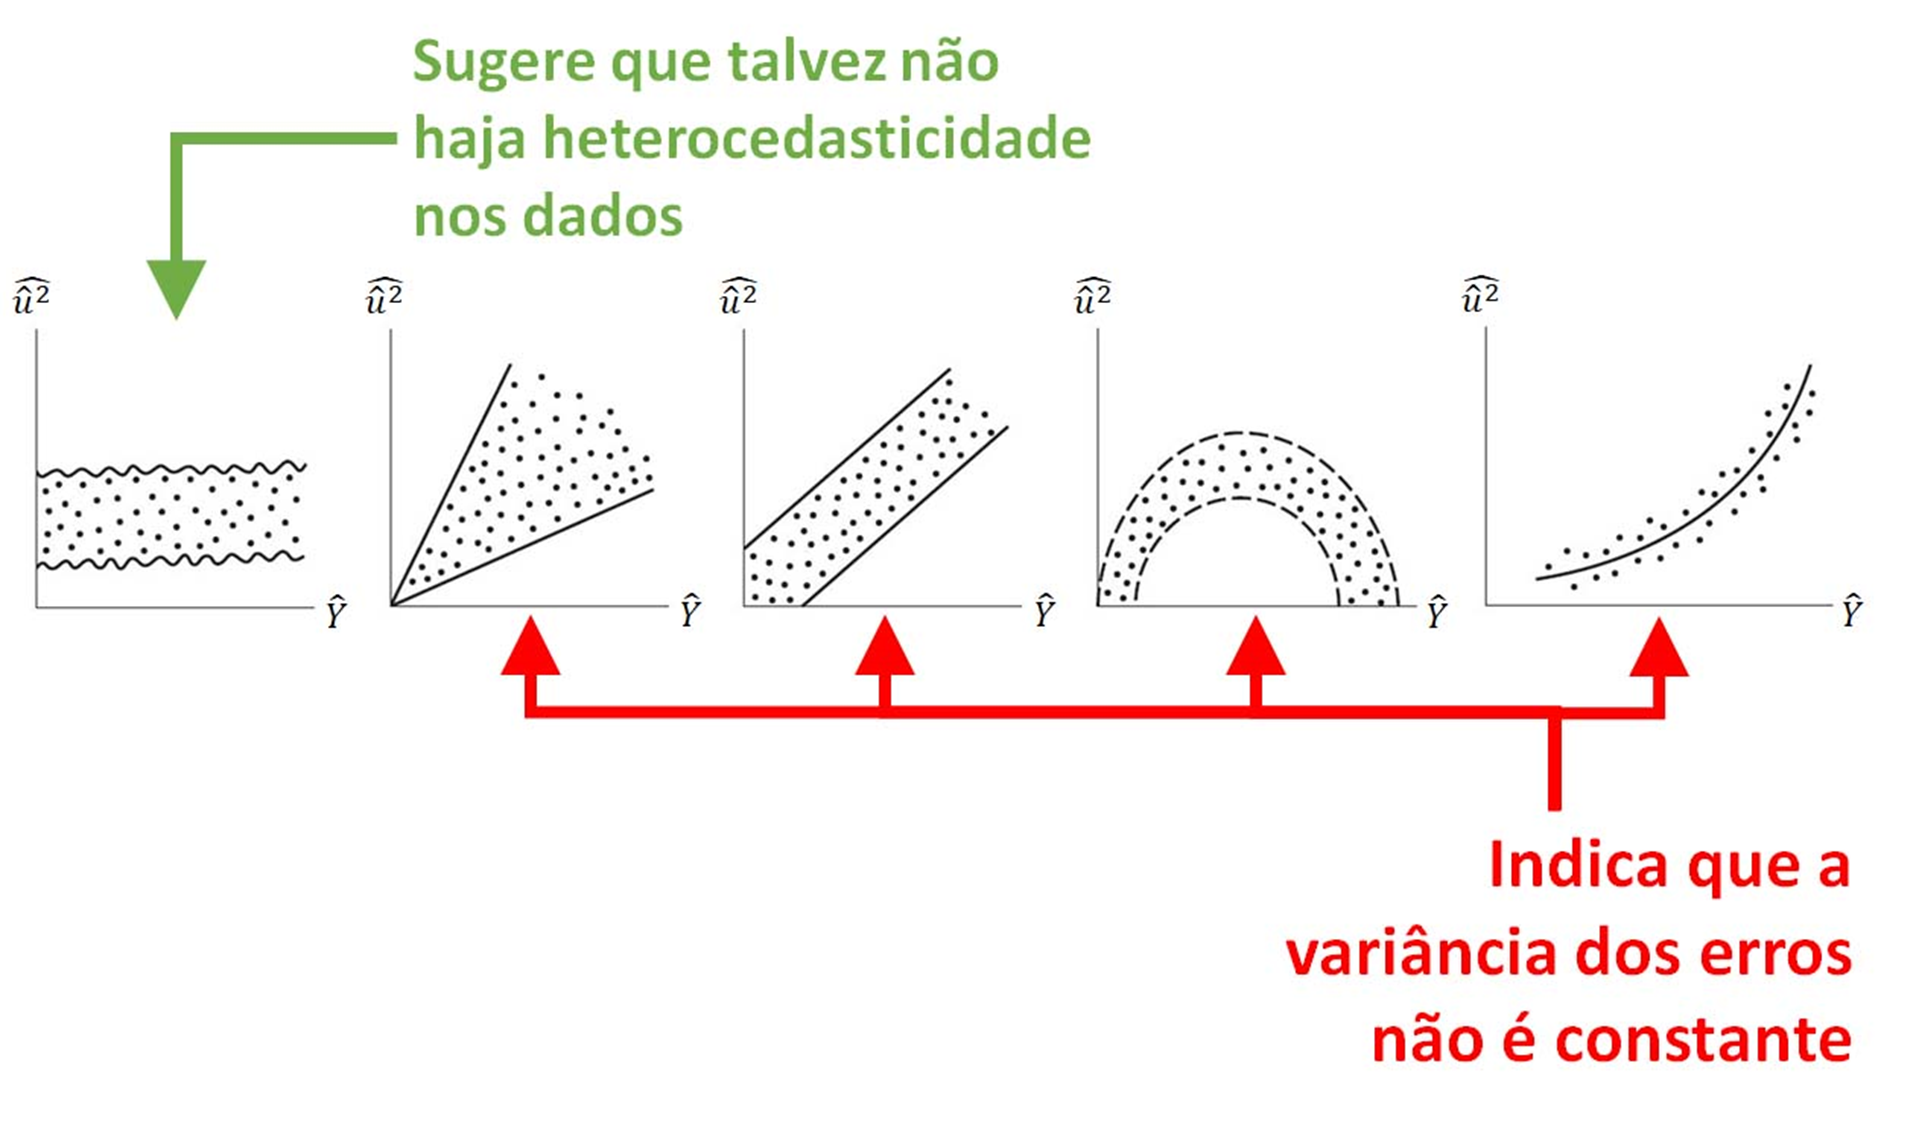

Quando olhamos para os resíduos, que estão no eixo Y, a maioria deles está em torno do zero. Isso é bom, porque queremos essa diferença entre o que observamos e o que estamos prevendo o mais próximo de zero possível.

No entanto, vemos que, à medida que o preço da casa aumenta, essa distância fica maior, fica mais longe do zero, então, estamos errando mais. Foi exatamente essa conclusão que tiramos do outro gráfico, mas aqui temos mais liberdade para analisar esse gráfico.

Esperamos que não exista um padrão nesse gráfico, porque, claramente, nas casas mais caras, estamos errando mais no preço delas, entre observar e precificar.

Então, tem algum aspecto das variáveis explicativas que não está sendo incluído no modelo, principalmente para precificar casas mais caras.

Esperamos, então, que esses resíduos não tenham padrão, que sejam totalmente aleatórios.

Quando fazemos um gráfico entre os preditos, o que estamos precificando com o nosso modelo, em relação aos resíduos, esperamos que esses pontos estejam dispostos de forma aleatória, sem um padrão, sem uma limitação no nosso modelo de regressão linear.

Aqui, falamos sobre um conceito mais técnico. Quando temos de forma aleatória, chamamos isso de homoscedasticidade. Esse é um conceito que você vai encontrar nas literaturas quando está falando sobre regressão linear.

Agora, o que não queremos que apareça no nosso modelo de regressão linear é justamente quando tem um padrão, ou seja, esses pontos não estão dispostos de forma aleatória em torno do zero.

Nesses casos, a disposição dos pontos pelo gráfico pode formar uma parábola, o desenho de um cone, que é justamente o que vimos no nosso modelo. Quando estamos vendo um padrão desses pontos, chamamos isso de heteroscedasticidade. Então, não estamos vendo a presença da homoscedasticidade, que é o que queremos dentro do nosso modelo.

# Por que a Heterocedasticidade é um Problema?
A presença de heterocedasticidade pode levar a estimativas de coeficientes ineficientes e a testes de hipóteses inválidos, comprometendo a confiabilidade das inferências estatísticas. Embora não afete a imparcialidade ou a consistência dos estimadores de mínimos quadrados ordinários, ela impacta na eficiência desses estimadores, tornando-os menos confiáveis.

# Identificando Heterocedasticidade
Um dos métodos mais comuns para detectar a heterocedasticidade é através da análise visual dos resíduos. Após ajustar um modelo de regressão linear, podemos plotar os resíduos em função dos valores previstos. Se os resíduos se espalharem de maneira uniforme, sem formar padrões ou funis, o modelo provavelmente apresenta homocedasticidade. Por outro lado, se a dispersão dos resíduos aumentar ou diminuir com os valores previstos, isso indica heterocedasticidade.

# Como Avaliar a Heterocedasticidade?
Além de uma análise visual dos resíduos, existem vários testes estatísticos para avaliar formalmente a presença de heterocedasticidade, como o teste de White e o teste de Breusch-Pagan. Estes testes ajudam a quantificar se a variância dos resíduos está relacionada com os valores previstos, fornecendo uma base mais sólida para decidir se a heterocedasticidade é uma preocupação significativa no modelo.

# Tratando a Heterocedasticidade
Se identificarmos heterocedasticidade, várias abordagens podem ser adotadas para lidar com o problema, como transformação de variáveis (por exemplo, logarítmica ou raiz quadrada) ou o uso de técnicas de regressão robustas, que são menos sensíveis à variância dos resíduos.

# Conclusão
Ao compreender e identificar a heterocedasticidade, podemos tomar medidas apropriadas para garantir que nossas análises de regressão linear sejam confiáveis e válidas. Esse cuidado nos permite fazer inferências mais precisas e fundamentadas, essenciais para a tomada de decisões baseadas em dados.